# Question 1

Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 




### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 


In [9]:
import pandas
data = pandas.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [10]:
data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

## Observations:

1. Mean is significantly higher than median
2. The standard deviation is ununsually high.
3. The max value in the data set is substantially high.

## Hypothesis

- There are some expensive order at the forth quartile that contributes to the high value of mean, standard deviation.
- These orders are outliers, which greatly affect the mean value, hence mean should not be a reported metric for this dataset.

<AxesSubplot:>

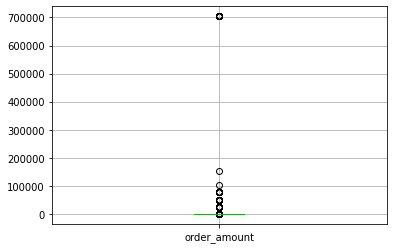

In [20]:
data.boxplot('order_amount')

As we can see, there are outliers at around 700000. 

In [33]:
data_points = data.groupby(['order_amount']).size()
expensive = data_points.reset_index(name='num_data_points').sort_values(by='order_amount', ascending = False)

In [34]:
expensive.head(10)

,order_amount,num_data_points
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


As we can see there are order who costs way more expensive than others, which are possibly the outliers.

In [35]:
luxury = data.loc[data['order_amount'].isin([704000,154350,102900, 77175, 51450, 25725])]

In [61]:
pandas.set_option('display.max_rows', data.shape[0]+1)
luxury.sort_values(by=['order_amount','created_at'], ascending = [False,True])

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00


Now let's look at the order cost $704000.
- We can see that these are all made at shop whose id is 42, and the same user whose id is 607.
- Each order are all created at 4:00 AM, and a fix total items, and there are even duplicated orders at some dates.
- I believe this is either caused by a system error, or mis-categorized as sneaker shop judging from the unexpectedly high price.

The rest of the order are made at the shop 78 with different user id. 
- It seems that the order value with \\$25725, \\$51450, \\$77175 are the same product since the price is proportional to the quantity.
- My hypothesis is that this shop is feature for a luxury sneaker which served in the medical or fasion industry. Otherwise it is mis-catoegorized as a sneaker shop.

The main difference between shop 42 and shop 78 is the quantity of the order.
- For shop 42, each order has a large quantity and is created very frequent by the same user. So I believe this is an essential, consumables products.
- For shop 78, each order come with limited quantity, which means each product may be customized. And this sounds like medical or fasion product.

In [39]:
IQR = data['order_amount'].quantile(.75) - data['order_amount'].quantile(.25)

In [46]:
filtered_data = data[(data['order_amount'] < data['order_amount'].quantile(.75) + 1.5*IQR) & (data['order_amount'] > data['order_amount'].quantile(.25) - 1.5*IQR)]

<AxesSubplot:>

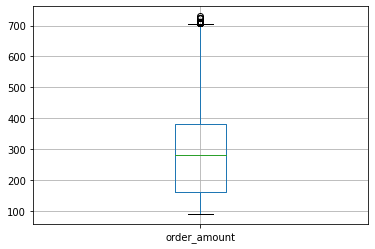

In [47]:
filtered_data.boxplot('order_amount')

As we can see from the above boxplot, there are some outliers on the top, which are being filtered out.


The new median and mean are more visible,so our filtered data set are much less spreaded.

### b. What metric would you report for this dataset?

As we can see, median,IQR are robust to outliers whereas mean value can be hugely effected by the outliers.

Hence median and IQR gives a better representation of central tendency than mean. 

Therefore I would report the median value and IQR as metric for this dataset.

### c. What is its value?

In [ ]:
filtered_data['order_amount'].describe()

As we can see, the mean value has been significantly decreased as well as the max value. 

And the value of the standard deviation is more reasonable.

# Question 2

### a. How many orders were shipped by Speedy Express in total?

There are **54** orders shipped by *Speedy Express* in total.

| num_orders   | 
| ------------- |
| 54|

### b.What is the last name of the employee with the most orders?

SELECT e.LastName, COUNT(*) AS num_orders
FROM Employees e JOIN Orders o ON e.EmployeeID = o.EmployeeID
GROUP BY e.LastName
ORDER BY num_orders DESC
LIMIT 1;

### b. What metric would you report for this dataset?

As we can see, median,IQR are robust to outliers whereas mean value can be hugely effected by the outliers.

Hence median and IQR gives a better representation of central tendency than mean. 

Therefore I would report the median value and IQR as metric for this dataset.

### c. What is its value?

In [49]:
filtered_data['order_amount'].describe()

count    4859.000000
mean      293.715374
std       144.453395
min        90.000000
25%       162.000000
50%       280.000000
75%       380.000000
max       730.000000
Name: order_amount, dtype: float64

As we can see, the mean value has been significantly decreased as well as the max value. 

And the value of the standard deviation is more reasonable.

# Question 2

### a. How many orders were shipped by Speedy Express in total?

There are **54** orders shipped by *Speedy Express* in total.

| num_orders   | 
| ------------- |
| 54|

### b.What is the last name of the employee with the most orders?

The employee with most orders = 40 has last name **Peacock**.

| LastName     | num_orders   | 
| ------------- |:-------------:|
| Peacock      | 40 |

### c. What product was ordered the most by customers in Germany?

**Boston Crab Meat** whose `ProductID`= *40* , `total_order` = 160 , was ordered the most by german customers.

| ProductID     | ProductName   | total_order  |
| ------------- |:-------------:| -----:|
| 40      | Boston Crab Meat | 160 |
